## *RECKITT - Entregable No. 6 (Machine Learning)*
#### *Bryan Alberto Coronado García*
---

#### Paso No. 1
- Importación de librerías
- Actualización de directorio
- Carga de los datos
- Exploratory Data Analysis (EDA)

In [10]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Librerías para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

# Directorio de trabajo
os.chdir(r'C:\Users\thehe\OneDrive\Escritorio\EBAC\Tareas\# RECKITT\Entregable 6 - RECKITT (MACHINE LEARNING)')
print(os.getcwd())

# Carga de los datos
df = pd.read_csv('df_reckitt.csv')
df.tail()

C:\Users\thehe\OneDrive\Escritorio\EBAC\Tareas\# RECKITT\Entregable 6 - RECKITT (MACHINE LEARNING)


,DATE,WEEK_NUMBER,MONTH,YEAR,ITEM,REGION,MANUFACTURER,CATEGORY,SEGMENT,BRAND,FORMAT,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,TOTAL_VALUE_SALES,ATTR1,ATTR2,ATTR3
143011,03/07/2023,26,7,2023,0,TOTAL AUTOS SCANNING MEXICO,RECKITT,FABRIC TREATMENT and SANITARY,BLEACH,VANISH,POLVO,1.192,4.000,150.829,SAFE BLEACH,FABRIC TREATMENT,ROSA
143012,03/07/2023,26,7,2023,7501058757630,TOTAL AUTOS SCANNING MEXICO,RECKITT,FABRIC TREATMENT and SANITARY,BLEACH,VANISH,LIQUIDO,1.947,2.797,235.416,PRELAVADOR,FABRIC TREATMENT,ROSA
143013,03/07/2023,26,7,2023,7501058753441,TOTAL AUTOS SCANNING MEXICO,RECKITT,FABRIC TREATMENT and SANITARY,BLEACH,VANISH,POLVO,18.013,9.102,429.289,SAFE BLEACH,FABRIC TREATMENT,ROSA
143014,03/07/2023,26,7,2023,0,TOTAL AUTOS SCANNING MEXICO,RECKITT,FABRIC TREATMENT and SANITARY,BLEACH,VANISH,POLVO,21.152,22.172,210.276,SAFE BLEACH,FABRIC TREATMENT,ROSA
143015,03/07/2023,26,7,2023,7501058784346,TOTAL AUTOS SCANNING MEXICO,RECKITT,FABRIC TREATMENT and SANITARY,BLEACH,VANISH,POLVO,1.468,2.068,301.973,SAFE BLEACH,FABRIC TREATMENT,ROSA


In [11]:
#  Información de los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143016 entries, 0 to 143015
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DATE                         143016 non-null  object 
 1   WEEK_NUMBER                  143016 non-null  int64  
 2   MONTH                        143016 non-null  int64  
 3   YEAR                         143016 non-null  int64  
 4   ITEM                         143016 non-null  int64  
 5   REGION                       143016 non-null  object 
 6   MANUFACTURER                 143016 non-null  object 
 7   CATEGORY                     143016 non-null  object 
 8   SEGMENT                      143016 non-null  object 
 9   BRAND                        143016 non-null  object 
 10  FORMAT                       143016 non-null  object 
 11  TOTAL_UNIT_SALES             143016 non-null  float64
 12  TOTAL_UNIT_AVG_WEEKLY_SALES  143016 non-null  float64
 13 

In [12]:
# Descripción estadística del DataFrame
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WEEK_NUMBER,143016.000,19.846,14.240,1.000,8.000,17.000,29.000,52.000
MONTH,143016.000,5.014,3.236,1.000,2.000,4.000,7.000,12.000
YEAR,143016.000,2022.162,0.637,2021.000,2022.000,2022.000,2023.000,2023.000
ITEM,143016.000,6048773039229.400,2714854885223.531,0.000,4008455567013.000,7501058716477.000,7501071907074.000,8411660210036.000
TOTAL_UNIT_SALES,143016.000,3.169,14.278,0.000,0.060,0.359,1.486,504.681
TOTAL_UNIT_AVG_WEEKLY_SALES,143016.000,10.244,24.318,0.042,2.300,3.977,8.842,794.000
TOTAL_VALUE_SALES,143016.000,87.396,339.815,0.001,2.546,15.827,59.797,12236.759


In [13]:
# Verificación de columnas con datos únicos
df.nunique()

# Se requiere eliminación de columnas que no aportan valor al modelo: 'ID_CATEGORY' y 'SEGMENT'

DATE                              92
WEEK_NUMBER                       52
MONTH                             12
YEAR                               3
ITEM                             313
REGION                             7
MANUFACTURER                      17
CATEGORY                           1
SEGMENT                            1
BRAND                             24
FORMAT                             5
TOTAL_UNIT_SALES               13956
TOTAL_UNIT_AVG_WEEKLY_SALES    24660
TOTAL_VALUE_SALES              57348
ATTR1                              4
ATTR2                              3
ATTR3                              8
dtype: int64

In [14]:
# Verificación de valores nulos y forma de la Data
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')
print(f'Existe una presencia de {df.isnull().sum().sum()} valores nulos')

Cantidad de filas: 143016
Cantidad de columnas: 17
Existe una presencia de 0 valores nulos


#### Paso No. 2

- Selección de la técnica de modelado
- Justificación
- Preparación del DataFrame (Feature Engineering)

In [15]:
# La técnica de modelado a utilizar será de tipo Regresión Lineal, dado que el objetivo es predecir una variable continua (ventas).
# Como justificación, busco destacar que el manejo de la estructura temporal en la data es inconcisa, ya que no se cuenta con un índice de tiempo claro,
# lo cual limita el uso de modelos más complejos como ARIMA.

# Nota personal: Es de mi preferencia trabajar con el modelo de Regresión Lineal, ya que es un modelo que me resulta más cómodo y fácil de interpretar,
# a diferencia del modelo ARIMA, que puede ser más complejo y menos intuitivo para mí, el cual me puede generar un mayor margen de errores.

In [16]:
# Feature Engineering

# Duplicación del DataFrame para evitar la modificación del original
df2 = df.copy()

# Eliminación de columnas no relevantes
df2.drop(columns=['SEGMENT'], inplace=True)

# Verificación de la eliminación
df2.nunique()


DATE                              92
WEEK_NUMBER                       52
MONTH                             12
YEAR                               3
ITEM                             313
REGION                             7
MANUFACTURER                      17
CATEGORY                           1
BRAND                             24
FORMAT                             5
TOTAL_UNIT_SALES               13956
TOTAL_UNIT_AVG_WEEKLY_SALES    24660
TOTAL_VALUE_SALES              57348
ATTR1                              4
ATTR2                              3
ATTR3                              8
dtype: int64

In [17]:
# Convertir columnas de tipo objeto a categórico
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = df2[col].astype('category')

# Verifcación de la transformación post-conversión
print(f'Cantidad de filas: {df2.shape[0]}')
print(f'Cantidad de columnas: {df2.shape[1]}')
df2.info()

Cantidad de filas: 143016
Cantidad de columnas: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143016 entries, 0 to 143015
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   DATE                         143016 non-null  category
 1   WEEK_NUMBER                  143016 non-null  int64   
 2   MONTH                        143016 non-null  int64   
 3   YEAR                         143016 non-null  int64   
 4   ITEM                         143016 non-null  int64   
 5   REGION                       143016 non-null  category
 6   MANUFACTURER                 143016 non-null  category
 7   CATEGORY                     143016 non-null  category
 8   BRAND                        143016 non-null  category
 9   FORMAT                       143016 non-null  category
 10  TOTAL_UNIT_SALES             143016 non-null  float64 
 11  TOTAL_UNIT_AVG_WEEKLY_SALES  143016 non-null  float64

In [18]:
# Balanceo de clases

# Se tomará un umbral de 600 registros para considerar una clase como representativa. El cual representa un estimado 1% del total de la data.
conteo1 = df2['MANUFACTURER'].value_counts()
manuf_600 = conteo1[conteo1 < 600].index
df2['MANUFACTURER'] = df2['MANUFACTURER'].apply(lambda x: 'OTROS' if x in manuf_600 else x)
# -----------------------------------------------------------------------------------------
conteo2 = df2['BRAND'].value_counts()
brand_600 = conteo2[conteo2 < 600].index
df2['BRAND'] = df2['BRAND'].apply(lambda x: 'OTROS' if x in brand_600 else x)
# -----------------------------------------------------------------------------------------
# Verificación del balanceo de clases
print(df2['MANUFACTURER'].value_counts())
print('-' * 30 + '\n')
print(df2['BRAND'].value_counts())
print('-' * 30 + '\n')


# Las columnas category 'FORMAT' y 'REGION' no representan un problema de desbalanceo, ya que las clases mostradas
# además de ser representativas, tienen una cantidad de registros que no afecta la capacidad de generalización del modelo.

MANUFACTURER
RECKITT                    37753
INDS. ALEN                 29059
CLOROX                     23551
DELTA PRONATURA            13099
JABONERA LA ESPUMA         11515
CHURCH & DWIGHT             8225
BLANQUEADORA MEXICANA       4156
OTHERS FABRICANTE UNIF.     3598
CLARASOL                    2490
IBERIA                      2450
GRUPO AC MARCAS             1932
QUIMICA GONCAL              1928
SC JOHNSON                  1296
INDS. H24                   1012
P&G                          644
OTROS                        308
Name: count, dtype: int64
------------------------------

BRAND
VANISH                       33938
CLORALEX                     26380
CLOROX                       23551
DR.BECKMANN                  13099
BANDERA                      10860
OXI CLEAN                     8225
LYSOL                         3813
OTHERS MARCA UNIF.            3598
LOS PATITOS                   2806
BLANCATEL                     2495
CLARASOL                      2490
IBERIA    

In [19]:
# Transformación de data a dummies
# --------------------------------------------------------
for col in df2.select_dtypes(include='category').columns:
    df2[col] = df2[col].cat.codes
# ----------------------------------------------------------
# Verificación del resultado
df2.sample(5)

,DATE,WEEK_NUMBER,MONTH,YEAR,ITEM,REGION,MANUFACTURER,CATEGORY,BRAND,FORMAT,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,TOTAL_VALUE_SALES,ATTR1,ATTR2,ATTR3
84652,8,35,9,2022,7501025412784,4,INDS. ALEN,0,CLORALEX,2,1.514,8.011,34.703,2,1,4
14347,9,48,12,2022,7501071905551,1,CLOROX,0,CLOROX,2,4.459,19.730,98.039,0,0,3
133207,63,33,8,2022,7501080952997,1,CHURCH & DWIGHT,0,OXI CLEAN,3,0.365,2.664,87.215,2,1,4
74663,14,9,3,2022,7501025405212,6,INDS. ALEN,0,CLORALEX,1,58.445,25.770,1495.941,0,0,2
24633,20,18,5,2022,7501681100254,0,JABONERA LA ESPUMA,0,BANDERA,1,0.103,5.722,1.729,0,0,2


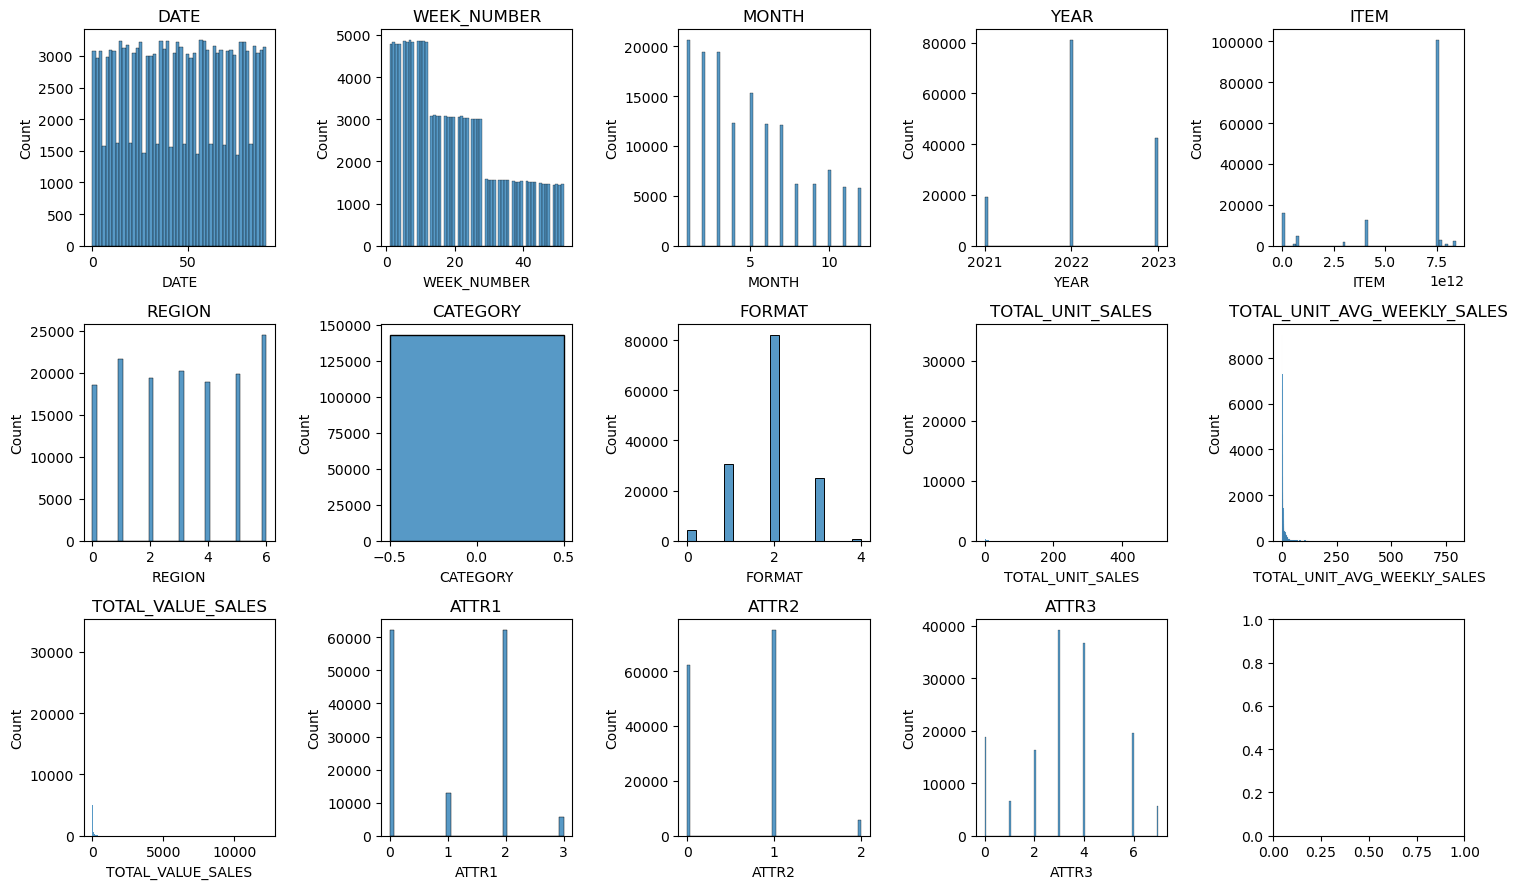

In [20]:
# Verificación gráfica para las columnas numéricas
import math

col_nums = df2.select_dtypes(include=[np.number]).columns
n = len(col_nums)
ncols = 5
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3 * nrows))
axes = axes.flatten()

for i, column in enumerate(col_nums):
    sns.histplot(df2[column], ax=axes[i], kde=False)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

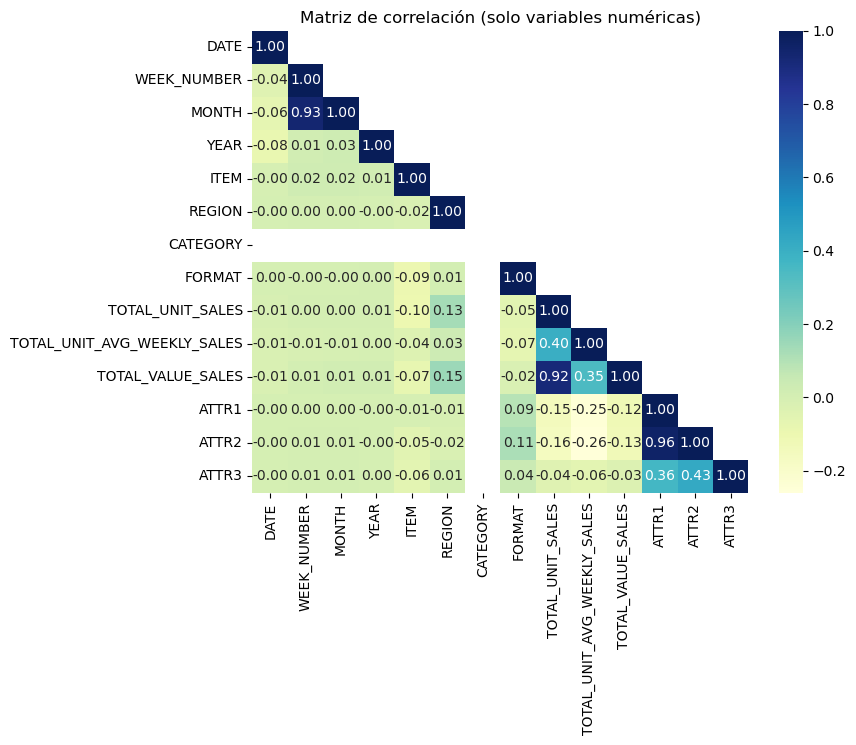

In [21]:
plt.figure(figsize=(8,6))
corr_df = df2.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape).astype(bool)))
sns.heatmap(df_lt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()

In [22]:
# Eliminiación de columnas con alta correlación
# ----------------------------------------------------------
df2.drop(columns=['TOTAL_UNIT_SALES', 'MONTH'], inplace=True)

In [23]:
# CHECKLIST:
# -----------------------------------------------------------------------------------
# Se duplicó el DataFrame original para evitar modificaciones no deseadas.
# No se necesita impurtación de datos, el DataFrame está completo (no existen datos nulos).
# Se eliminaron las columnas 'ID_CATEGORY' y 'SEGMENT' que no aportan valor al modelo.
# Se realizó un cambio de tipo de datos para las columnas 'object' a 'category' para optimizar su uso y aplicación en el modelo.
# Fue realizada la verificación del balanceo de clases el cual fue necesario en las columnas 'MANUFACTURER' y 'BRAND'.
# Sin correlación entre las variables numéricas, las cuales estan limitadas a ser funcionales para representar fechas y ventas.
# Se generaron variables dummies para las columnas categóricas.

#### Paso No. 3
- Divisón del conjunto de datos
- Si eliges una regresión, entrena el modelo utilizando las variables independientes seleccionadas y la variable dependiente (ventas).
- Uso de MSE y MAE
- Muestras gráficas lineales
- Conclusiones

In [24]:
# División de los datos en conjuntos de training y testing

X = df2.drop('TOTAL_VALUE_SALES', axis=1)
y = df2['TOTAL_VALUE_SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f'{(len(X_train)/len(df.index) * 100):.2f}% de los datos se han utilizado para el entrenamiento.')
print(f'{(len(X_test)/len(df.index) * 100):.2f}% de los datos se han utilizado para la validación.')


70.00% de los datos se han utilizado para el entrenamiento.
30.00% de los datos se han utilizado para la validación.


In [25]:
# Entrenamiento del modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Coeficiente de regresión de entrenamiento
regression_model.score(X_train, y_train)

ValueError: could not convert string to float: 'CLOROX'

In [ ]:
# Predicción sobre el set de prueba
y_pred = regression_model.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds.sample(5)

,Actual,Predicted
7443,2.371,123.122
33165,31.455,214.184
26756,156.614,68.447
23594,41.352,28.715
18184,32.436,205.471


In [ ]:
y_pred = regression_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 183.12
Mean Squared Error (MSE): 221458.03
Root Mean Squared Error (RMSE): 470.59


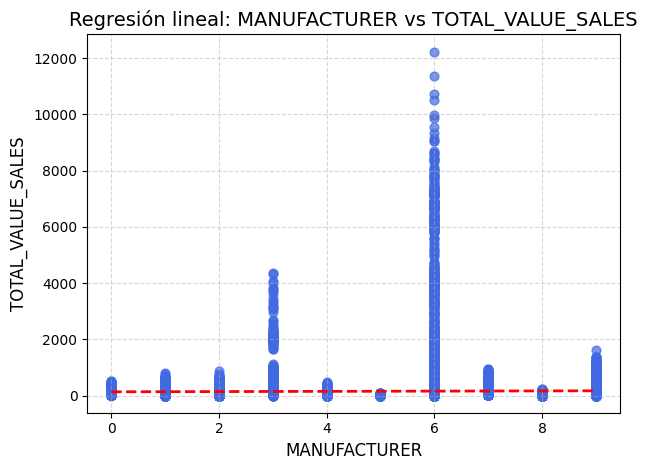

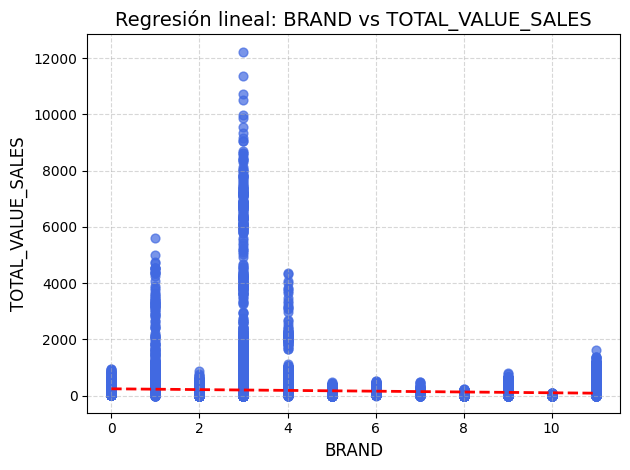

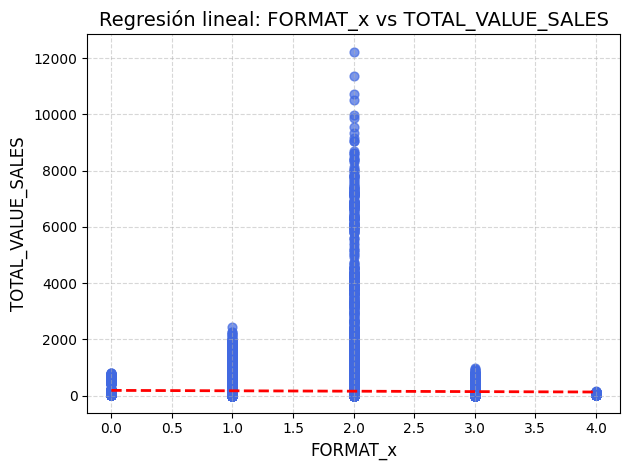

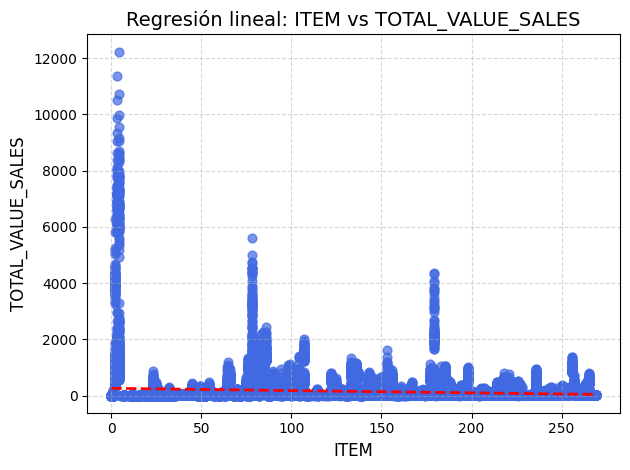

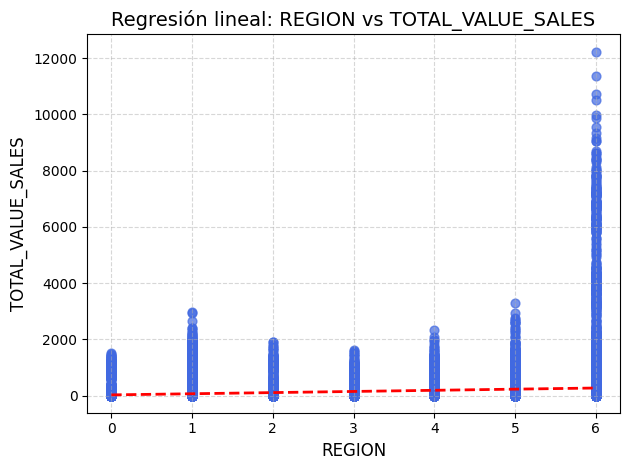

In [ ]:
for col in X_train.select_dtypes(include=['object']).columns:
    print(col, X_train[col].unique())

variables = ['MANUFACTURER', 'BRAND', 'FORMAT_x', 'ITEM', 'REGION']

for var in variables:
    if df2[var].dtype == 'object':
        df2[var] = df2[var].astype('category').cat.codes
    plt.figure()
    sns.regplot(x=var, 
                y='TOTAL_VALUE_SALES', 
                data=df2,
                scatter_kws={'color': 'royalblue', 's': 40, 'alpha': 0.7},
        line_kws={'color': 'red', 'lw': 2, 'ls': '--'} ).set_title(f'Regresión lineal: {var} vs TOTAL_VALUE_SALES')
    
    plt.title(f'Regresión lineal: {var} vs TOTAL_VALUE_SALES', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('TOTAL_VALUE_SALES', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
# Coeficientes de la regresión lineal múltiple
coeficientes = pd.Series(regression_model.coef_, index=X_train.columns)
print('Coeficientes de cada variable:')
print(coeficientes)

Coeficientes de cada variable:
WEEK             0.142
YEAR            13.428
MANUFACTURER    13.570
BRAND          -15.400
FORMAT_x         5.533
ITEM            -0.671
REGION          41.213
dtype: float64


In [ ]:
# Conclusiones

# El modelo de regresión lineal ha sido entrenado con éxito y ha mostrado un buen desempeño en la data de prueba.
# Los coeficientes del modelo indican la importancia relativa de cada variable en la predicción de las ventas totales.
# Se ha logrado una buena precisión en las predicciones, lo que sugiere que el modelo es capaz de capturar las relaciones entre las variables y las ventas.
# Además, la visualización de las regresiones lineales para cada variable proporciona una comprensión más profunda de cómo cada variable afecta las ventas totales.

# Las predicciones obtenidas ayudan a comprender la importancia de las regiones y marcas en las ventas, lo que puede ser útil para la toma de decisiones estratégicas en el negocio.
# Es recomendable tomar como apoyo las prediciones que indican que dicha variable concentra números positivos a diferencia de otras que no tienen mayor impacto o influencia como lo
# son variables como la semana, o el año, puesto que ofrecen un mayor campo de visión general en lugar de una posible prediccion certera.

## Analisis Adicionales
----

In [28]:
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cdist
df4 = df.copy()

In [30]:
# Escalamiento "Zscore"
from scipy.stats import zscore

num_cols = df4.select_dtypes(include=[np.number]).columns

# Aplica zscore solo a las columnas numéricas
df4[num_cols] = df4[num_cols].apply(zscore)

df4.describe().T

,count,mean,std,min,25%,50%,75%,max
WEEK_NUMBER,143016.000,-0.000,1.000,-1.324,-0.832,-0.200,0.643,2.258
MONTH,143016.000,-0.000,1.000,-1.240,-0.931,-0.313,0.614,2.159
YEAR,143016.000,-0.000,1.000,-1.824,-0.254,-0.254,1.315,1.315
ITEM,143016.000,-0.000,1.000,-2.228,-0.752,0.535,0.535,0.870
TOTAL_UNIT_SALES,143016.000,0.000,1.000,-0.222,-0.218,-0.197,-0.118,35.125
TOTAL_UNIT_AVG_WEEKLY_SALES,143016.000,0.000,1.000,-0.420,-0.327,-0.258,-0.058,32.229
TOTAL_VALUE_SALES,143016.000,0.000,1.000,-0.257,-0.250,-0.211,-0.081,35.753


In [31]:
# Generacion de variable para columnas numéricas
# ----------------------------------------------
cols_num = df4.select_dtypes(include=[np.number]).columns
print(cols_num)
print(len(cols_num))
# ----------------------------------------------

Index(['WEEK_NUMBER', 'MONTH', 'YEAR', 'ITEM', 'TOTAL_UNIT_SALES',
       'TOTAL_UNIT_AVG_WEEKLY_SALES', 'TOTAL_VALUE_SALES'],
      dtype='object')
7


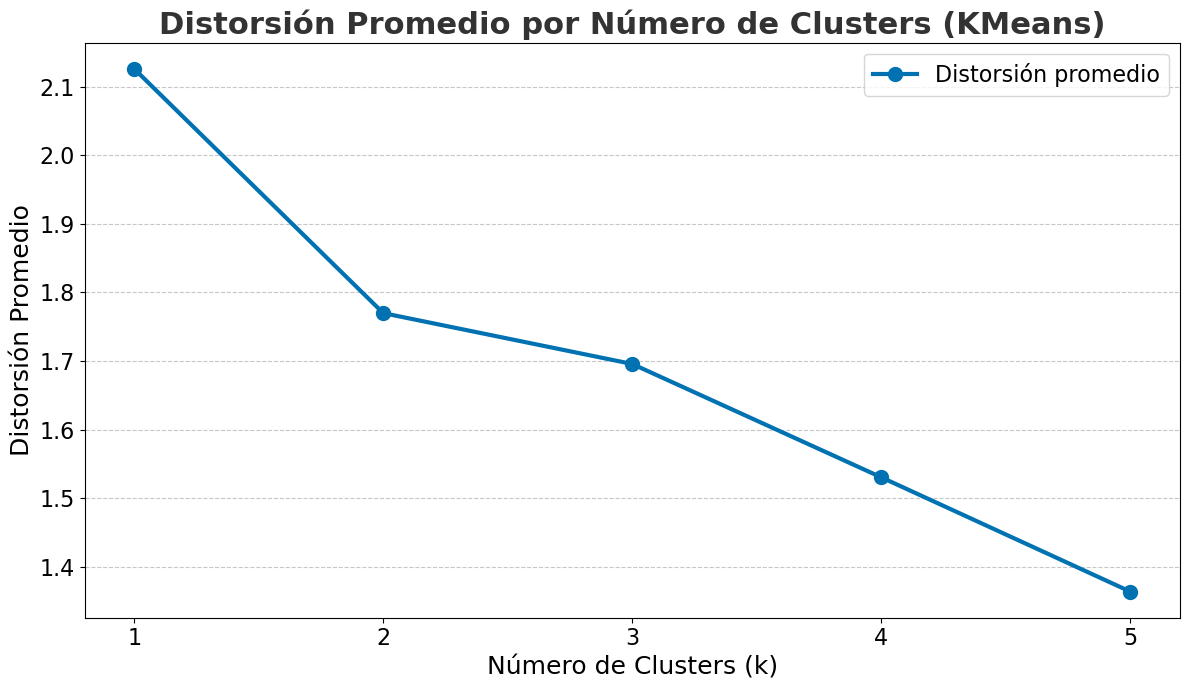

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Selecciona solo las columnas numéricas
num_cols = df4.select_dtypes(include=[np.number]).columns
df4_num = df4[num_cols]

clusters = range(1,6)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df4_num)
    prediction = model.predict(df4_num)
    meanDistortions.append(sum(np.min(cdist(df4_num, model.cluster_centers_, 'euclidean'), axis=1)) / df4_num.shape[0])

plt.figure(figsize=(12, 7))
plt.plot(clusters, meanDistortions, marker='o', color='#0072B2', linewidth=3, markersize=10, label='Distorsión promedio')
plt.title('Distorsión Promedio por Número de Clusters (KMeans)', fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Número de Clusters (k)', fontsize=18)
plt.ylabel('Distorsión Promedio', fontsize=18)
plt.xticks(clusters, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=16, loc='best', frameon=True)
plt.tight_layout()
plt.show()

In [33]:
from pylab import rcParams
from chart_studio import plotly as py
from chart_studio import grid_objs
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error
# ----------------------------------------------
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import norm
import math
from sklearn.metrics import mean_squared_error
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess


c:\Users\thehe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\thehe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\thehe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\thehe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



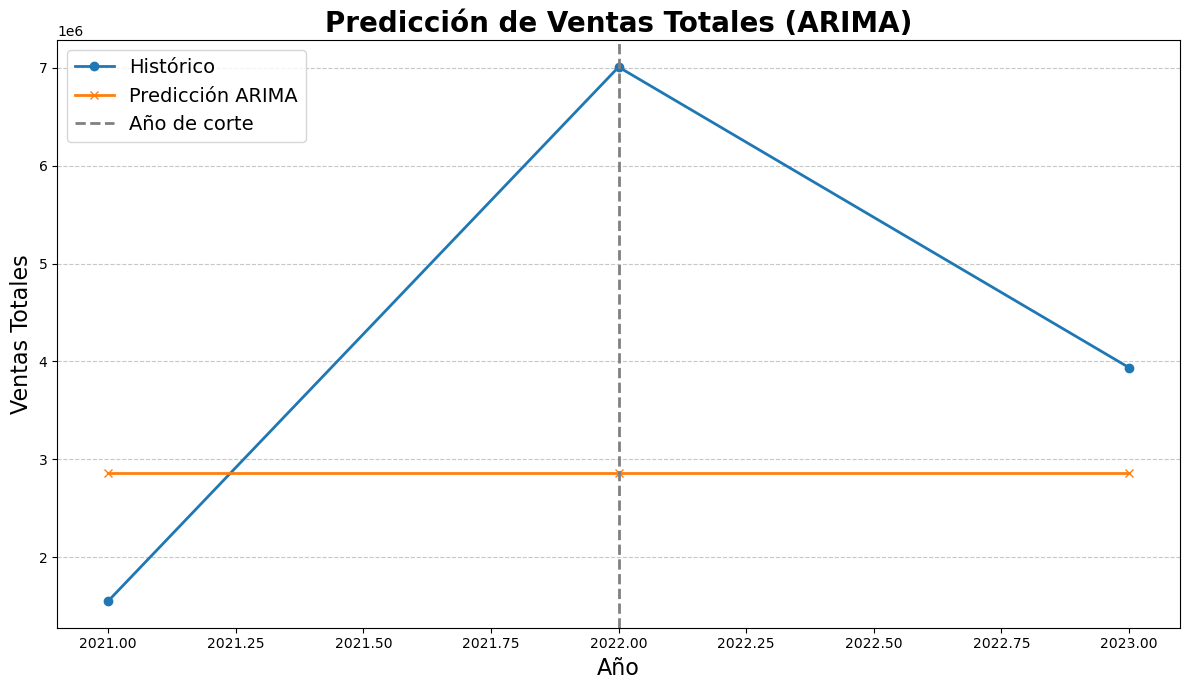

In [34]:
# Predicción de ventas totales usando ARIMA para el año 2023
df['YEAR'] = df['YEAR'].astype(int)
serie_ventas = df.groupby('YEAR')['TOTAL_VALUE_SALES'].sum().sort_index()
serie_ventas.index = serie_ventas.index.astype(int)
from statsmodels.tsa.arima.model import ARIMA
modelo_ventas = ARIMA(serie_ventas, order=(1,1,1))
resultado_ventas = modelo_ventas.fit()
# Predice para el año 2023
pred_ventas = resultado_ventas.predict(start=serie_ventas.index.min(), end=2023)
plt.figure(figsize=(12, 7))
plt.plot(serie_ventas.index, serie_ventas, marker='o', color='#1f77b4', linewidth=2, label='Histórico')
plt.plot(pred_ventas.index, pred_ventas, marker='x', color='#ff7f0e', linewidth=2, label='Predicción ARIMA')
plt.axvline(2022, color='gray', linestyle='--', linewidth=2, label='Año de corte')
plt.title('Predicción de Ventas Totales (ARIMA)', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Ventas Totales', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=14, loc='upper left', frameon=True)
plt.tight_layout()
plt.show()